In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [3]:
pip install pandas numpy scikit-learn matplotlib searborn

ERROR: Could not find a version that satisfies the requirement searborn (from versions: none)
ERROR: No matching distribution found for searborn


In [42]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [43]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,RocCurveDisplay


In [9]:
statlog_german_credit_data=fetch_ucirepo(id=144)
X=statlog_german_credit_data.data.features
Y=statlog_german_credit_data.data.targets
print(X.head())
print(Y.head())

  Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
0        A75           4        A93        A101            4        A121   
1        A73           2        A92        A101            2        A121   
2        A74           2        A93        A101            3        A121   
3        A74           2        A93        A103            4        A122   
4        A73           3        A93        A101            4        A124   

   Attribute13 Attribute14 Attribute15  Attribute16 Attribute17  Attribute18  \
0           67        A1

In [14]:
print(X.info())
print(X.describe())

print(X.isnull().sum())
print(Y.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attribute20  1000 non-null  

In [16]:
categories_cols=X.select_dtypes(include='object').columns
print("Categorical Columns:",categories_cols)

Categorical Columns: Index(['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7',
       'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14',
       'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20'],
      dtype='object')


In [17]:
X_encoded=pd.get_dummies(X,columns=categories_cols,drop_first=True)

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X_encoded,Y,test_size=0.2,random_state=42,stratify=Y)

In [30]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [31]:
model=LogisticRegression()
model.fit(X_train_scaled,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

              precision    recall  f1-score   support

           1       0.83      0.87      0.85       140
           2       0.66      0.58      0.62        60

    accuracy                           0.79       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.78      0.79      0.78       200

ROC AUC Score: 0.7999999999999999


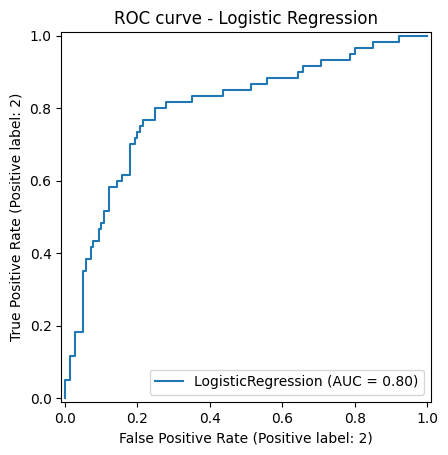

In [33]:
Y_pred=model.predict(X_test_scaled)
Y_proba=model.predict_proba(X_test_scaled)[:,1]
print(classification_report(Y_test,Y_pred))
print("ROC AUC Score:",roc_auc_score(Y_test,Y_proba))

RocCurveDisplay.from_estimator(model,X_test_scaled,y_test)
plt.title("ROC curve - Logistic Regression")
plt.show()

In [36]:
joblib.dump(model,'credit_model.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X_train.columns.tolist(),'model_columns.pkl')

['model_columns.pkl']

In [37]:
def predict_worth(user_data):
  model=joblib.load('credit_model.pkl')
  scaler=joblib.load('scaler.pkl')
  model_columns=joblib.load('model_columns.pkl')
  user_df=pd.DataFrame([user_data])
  user_df_encoded=pd.get_dummies(user_df)
  user_df_encoded=user_df_encoded.reindex(columns=model_columns,fill_value=0)
  user_df_scaled=scaler.transform(user_df_encoded)
  prediction=model.predict(user_df_scaled)[0]
  proba=model.predict_proba(user_df_scaled)[0][1]
  result="Good Credit Risk" if prediction==1 else "Bad Credit Risk"
  return {"prediction":result,"probability_of_good":round(proba,3)}

In [40]:
new_user = {
    "duration": 12,
    "credit_amount": 5000,
    "age": 35,
    "purpose": "car",
    "sex": "male",
    "housing": "own",
    "job": "skilled",
    "checking_status": "<0",
}

output = predict_worth(new_user)
print(output)


{'prediction': 'Bad Credit Risk', 'probability_of_good': np.float64(0.637)}
